# What makes a popular story popular?

## Word cloud of InfoWars Status Messages from October 2016 to May 31, 2017

(-0.5, 399.5, 199.5, -0.5)

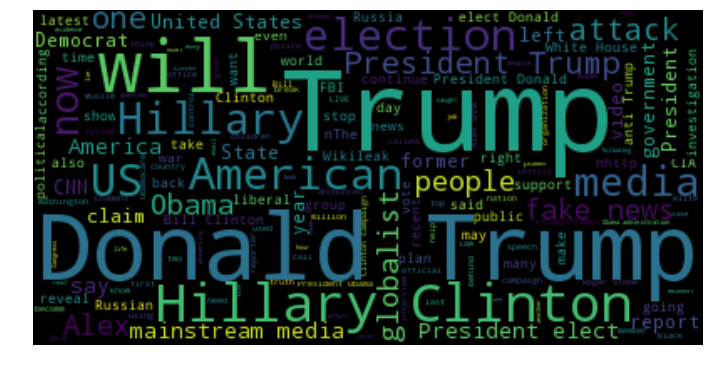

In [78]:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")

## Post-Inauguration Word cloud of InfoWars Status Messages
## from January 21, 2016 to May 31, 2017

(-0.5, 399.5, 199.5, -0.5)

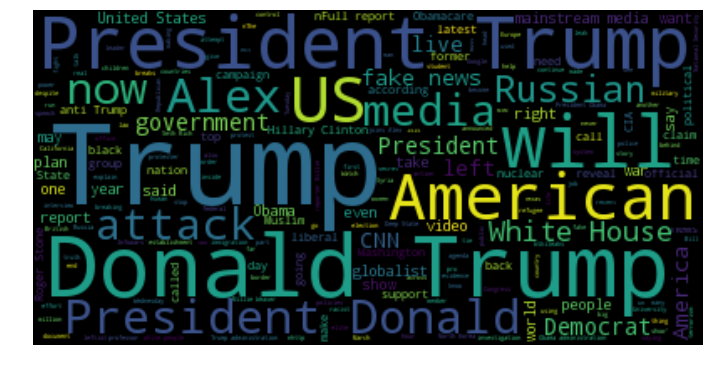

In [74]:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")

In [1]:
from urllib.request import urlopen, Request
import json
import datetime
import csv
import time
import string
from nltk.corpus import stopwords
stop = stopwords.words('english')

In [2]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv("80256732576_facebook_statuses.csv")

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4606 entries, 0 to 4605
Data columns (total 16 columns):
status_id           4606 non-null object
status_message      3406 non-null object
link_name           4595 non-null object
status_type         4606 non-null object
status_link         4597 non-null object
status_published    4606 non-null object
num_reactions       4606 non-null int64
num_comments        4606 non-null int64
num_shares          4606 non-null int64
num_likes           4606 non-null int64
num_loves           4606 non-null int64
num_wows            4606 non-null int64
num_hahas           4606 non-null int64
num_sads            4606 non-null int64
num_angrys          4606 non-null int64
num_special         4606 non-null int64
dtypes: int64(10), object(6)
memory usage: 575.8+ KB


In [5]:
df.head()

,status_id,status_message,link_name,status_type,status_link,status_published,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys,num_special
0,80256732576_10155418799987577,Omar Navarro In Striking Distance Of Maxine Wa...,Omar Navarro In Striking Distance Of Maxine Wa...,video,https://www.facebook.com/80256732576/videos/10...,2017-05-31 18:30:00,2338,288,992,2051,236,32,16,0,3,0
1,80256732576_10155418709737577,Trump's Secret Weapon: Delivering\n\nRoger Sto...,Trump's Secret Weapon: Delivering,video,https://www.facebook.com/80256732576/videos/10...,2017-05-31 17:30:00,181,37,40,158,17,0,6,0,0,0
2,80256732576_10155418845037577,Full Show - Infowars Launches Operation Expose...,Full Show - Infowars Launches Operation Expose...,video,https://www.facebook.com/80256732576/videos/10...,2017-05-31 17:22:49,201,54,47,176,10,2,8,0,5,0
3,80256732576_10155422200638459,The RompHim Is For Pussies,The RompHim Is For Pussies,video,https://www.facebook.com/80256732576/videos/10...,2017-05-31 16:05:43,1359,230,597,885,74,2,394,2,2,0
4,80256732576_10155418780227577,CNN analyst claimed that the Trumps are taking...,CNN: Trumps “Playing The Victim” Over ‘Beheadi...,link,https://www.infowars.com/cnn-trumps-playing-th...,2017-05-31 16:05:03,603,338,52,169,3,33,98,3,297,0


In [6]:
df.describe()

,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys,num_special
count,4606.000000,4606.000000,4606.000000,4606.000000,4606.000000,4606.000000,4606.000000,4606.000000,4606.000000,4606.000000
mean,889.918584,119.602258,313.425098,640.458315,33.737733,31.592488,77.919019,9.814807,96.204733,0.191489
std,1360.841720,199.694758,4192.836270,1151.674891,94.096249,59.414352,197.855443,34.213169,210.120922,2.235296
min,12.000000,0.000000,0.000000,12.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,267.000000,35.000000,1.000000,188.000000,3.000000,4.000000,4.000000,0.000000,2.000000,0.000000
50%,541.000000,68.000000,92.000000,360.500000,7.000000,13.000000,14.000000,2.000000,16.000000,0.000000
75%,1079.750000,134.000000,265.000000,735.000000,26.000000,33.000000,61.000000,7.000000,102.000000,0.000000
max,58845.000000,5508.000000,281691.000000,55322.000000,2388.000000,1345.000000,3115.000000,1355.000000,3257.000000,99.000000


In [7]:
# Most reactions
df.query("num_reactions == 58845")

,status_id,status_message,link_name,status_type,status_link,status_published,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys,num_special
2102,80256732576_10155060846937577,NaN,Trump to Defund California,video,https://www.facebook.com/80256732576/videos/10...,2017-02-09 13:40:51,58845,5508,281691,55322,2388,111,696,41,287,0


In [8]:
# Most comments
df.query("num_comments == 5508")

,status_id,status_message,link_name,status_type,status_link,status_published,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys,num_special
2102,80256732576_10155060846937577,NaN,Trump to Defund California,video,https://www.facebook.com/80256732576/videos/10...,2017-02-09 13:40:51,58845,5508,281691,55322,2388,111,696,41,287,0


In [9]:
# Most shares
df.query("num_shares == 281691")

,status_id,status_message,link_name,status_type,status_link,status_published,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys,num_special
2102,80256732576_10155060846937577,NaN,Trump to Defund California,video,https://www.facebook.com/80256732576/videos/10...,2017-02-09 13:40:51,58845,5508,281691,55322,2388,111,696,41,287,0


In [10]:
# create a new feature to see the total engagement on a post
df['num_total_engagement'] = df['num_reactions'] + df['num_shares'] + df["num_comments"] 

In [11]:
df.describe()

,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys,num_special,num_total_engagement
count,4606.000000,4606.000000,4606.000000,4606.000000,4606.000000,4606.000000,4606.000000,4606.000000,4606.000000,4606.000000,4606.000000
mean,889.918584,119.602258,313.425098,640.458315,33.737733,31.592488,77.919019,9.814807,96.204733,0.191489,1322.945940
std,1360.841720,199.694758,4192.836270,1151.674891,94.096249,59.414352,197.855443,34.213169,210.120922,2.235296,5341.609534
min,12.000000,0.000000,0.000000,12.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,16.000000
25%,267.000000,35.000000,1.000000,188.000000,3.000000,4.000000,4.000000,0.000000,2.000000,0.000000,360.000000
50%,541.000000,68.000000,92.000000,360.500000,7.000000,13.000000,14.000000,2.000000,16.000000,0.000000,770.000000
75%,1079.750000,134.000000,265.000000,735.000000,26.000000,33.000000,61.000000,7.000000,102.000000,0.000000,1516.000000
max,58845.000000,5508.000000,281691.000000,55322.000000,2388.000000,1345.000000,3115.000000,1355.000000,3257.000000,99.000000,346044.000000


In [12]:
# Most shares
df.query("num_total_engagement == 346044")

,status_id,status_message,link_name,status_type,status_link,status_published,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys,num_special,num_total_engagement
2102,80256732576_10155060846937577,NaN,Trump to Defund California,video,https://www.facebook.com/80256732576/videos/10...,2017-02-09 13:40:51,58845,5508,281691,55322,2388,111,696,41,287,0,346044


link      2996
video     1443
photo      157
status       9
note         1
Name: status_type, dtype: int64


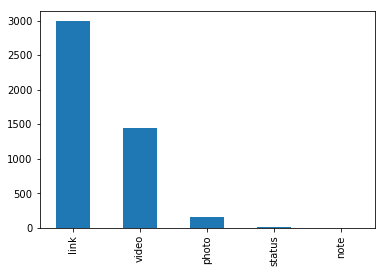

In [13]:
df['status_type'].value_counts().plot(kind='bar')
print(df['status_type'].value_counts())

In [14]:
df_status = pd.get_dummies(df['status_type'])

In [15]:
df_status.head()

,link,note,photo,status,video
0,0,0,0,0,1
1,0,0,0,0,1
2,0,0,0,0,1
3,0,0,0,0,1
4,1,0,0,0,0


In [16]:
df1 = pd.concat([df,df_status], axis=1)

In [17]:
df1.head()

,status_id,status_message,link_name,status_type,status_link,status_published,num_reactions,num_comments,num_shares,num_likes,...,num_hahas,num_sads,num_angrys,num_special,num_total_engagement,link,note,photo,status,video
0,80256732576_10155418799987577,Omar Navarro In Striking Distance Of Maxine Wa...,Omar Navarro In Striking Distance Of Maxine Wa...,video,https://www.facebook.com/80256732576/videos/10...,2017-05-31 18:30:00,2338,288,992,2051,...,16,0,3,0,3618,0,0,0,0,1
1,80256732576_10155418709737577,Trump's Secret Weapon: Delivering\n\nRoger Sto...,Trump's Secret Weapon: Delivering,video,https://www.facebook.com/80256732576/videos/10...,2017-05-31 17:30:00,181,37,40,158,...,6,0,0,0,258,0,0,0,0,1
2,80256732576_10155418845037577,Full Show - Infowars Launches Operation Expose...,Full Show - Infowars Launches Operation Expose...,video,https://www.facebook.com/80256732576/videos/10...,2017-05-31 17:22:49,201,54,47,176,...,8,0,5,0,302,0,0,0,0,1
3,80256732576_10155422200638459,The RompHim Is For Pussies,The RompHim Is For Pussies,video,https://www.facebook.com/80256732576/videos/10...,2017-05-31 16:05:43,1359,230,597,885,...,394,2,2,0,2186,0,0,0,0,1
4,80256732576_10155418780227577,CNN analyst claimed that the Trumps are taking...,CNN: Trumps “Playing The Victim” Over ‘Beheadi...,link,https://www.infowars.com/cnn-trumps-playing-th...,2017-05-31 16:05:03,603,338,52,169,...,98,3,297,0,993,1,0,0,0,0


In [18]:
# Be advised that not all variables are independent
# reactions are the total of likes, loves, wows, hahas, sads, and angrys
# total engagement is the total of reactions, comments, and shares
df1.corr()

,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys,num_special,num_total_engagement,link,note,photo,status,video
num_reactions,1.000000,0.674360,0.692829,0.971653,0.770095,0.355815,0.455612,0.169820,0.248577,0.010255,0.823802,0.116891,-0.008901,0.055222,-0.022272,-0.139365
num_comments,0.674360,1.000000,0.470781,0.566670,0.404915,0.382900,0.536128,0.218161,0.431519,0.007144,0.578721,0.094327,-0.008163,-0.010130,-0.020939,-0.090754
num_shares,0.692829,0.470781,1.000000,0.752681,0.415560,0.090217,0.093056,0.033744,0.056931,-0.002039,0.979046,-0.010686,-0.001102,-0.006090,-0.002784,0.013668
num_likes,0.971653,0.566670,0.752681,1.000000,0.800408,0.231783,0.326932,0.069188,0.068656,0.011724,0.859534,0.071883,-0.007479,0.069069,-0.017624,-0.099001
num_loves,0.770095,0.404915,0.415560,0.800408,1.000000,0.023432,0.269373,-0.039819,-0.101634,0.044967,0.537518,0.050241,-0.003718,0.044424,-0.011843,-0.067782
num_wows,0.355815,0.382900,0.090217,0.231783,0.023432,1.000000,0.165284,0.270699,0.541311,-0.024155,0.175778,0.170484,-0.007588,-0.055105,-0.019641,-0.151592
num_hahas,0.455612,0.536128,0.093056,0.326932,0.269373,0.165284,1.000000,0.005919,0.048798,0.008124,0.209159,0.086509,-0.005730,0.048081,-0.016682,-0.105972
num_sads,0.169820,0.218161,0.033744,0.069188,-0.039819,0.270699,0.005919,1.000000,0.493680,-0.016687,0.077906,0.090917,-0.004228,-0.025495,-0.012407,-0.082175
num_angrys,0.248577,0.431519,0.056931,0.068656,-0.101634,0.541311,0.048798,0.493680,1.000000,-0.026721,0.124148,0.196352,-0.006748,-0.066929,-0.019021,-0.173645
num_special,0.010255,0.007144,-0.002039,0.011724,0.044967,-0.024155,0.008124,-0.016687,-0.026721,1.000000,0.001279,-0.025608,-0.001263,0.053500,-0.003791,0.005797


In [19]:
correlated_with_shares = df1.corr()['num_shares'].sort_values()

In [20]:
# post type does not have a statistically significant correlation with sharing
# love reactions and comments have a moderate correlation to sharing
correlated_with_shares

link                   -0.010686
photo                  -0.006090
status                 -0.002784
num_special            -0.002039
note                   -0.001102
video                   0.013668
num_sads                0.033744
num_angrys              0.056931
num_wows                0.090217
num_hahas               0.093056
num_loves               0.415560
num_comments            0.470781
num_reactions           0.692829
num_likes               0.752681
num_total_engagement    0.979046
num_shares              1.000000
Name: num_shares, dtype: float64

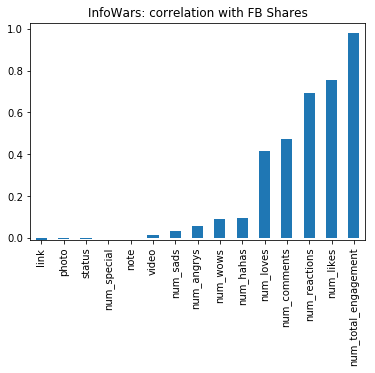

In [21]:
correlated_with_shares.iloc[:-1].plot(kind='bar',
                                        title='InfoWars: correlation with FB Shares')

In [22]:
correlated_with_reactions = df1.corr()['num_reactions'].sort_values()

In [23]:
# links and photos have a weak statistically significant correlation with FB reactions
# Sharing and comments are strongly correlated with reactions
# We also have a weak negative correlation between videos and reactions
correlated_with_reactions

video                  -0.139365
status                 -0.022272
note                   -0.008901
num_special             0.010255
photo                   0.055222
link                    0.116891
num_sads                0.169820
num_angrys              0.248577
num_wows                0.355815
num_hahas               0.455612
num_comments            0.674360
num_shares              0.692829
num_loves               0.770095
num_total_engagement    0.823802
num_likes               0.971653
num_reactions           1.000000
Name: num_reactions, dtype: float64

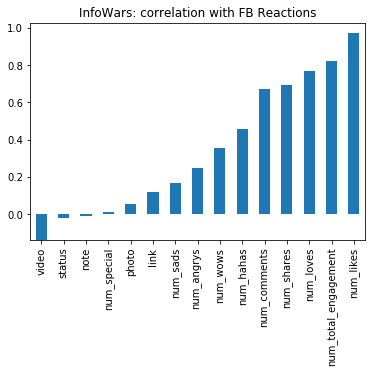

In [24]:
correlated_with_reactions.iloc[:-1].plot(kind='bar',
                                        title='InfoWars: correlation with FB Reactions')

In [25]:
correlated_with_comments = df1.corr()['num_comments'].sort_values()

In [26]:
# videos have a weak negative correlation to commenting
# links have a weak correlation to commenting
# like and haha reactions have a moderate correlation to commenting
correlated_with_comments

video                  -0.090754
status                 -0.020939
photo                  -0.010130
note                   -0.008163
num_special             0.007144
link                    0.094327
num_sads                0.218161
num_wows                0.382900
num_loves               0.404915
num_angrys              0.431519
num_shares              0.470781
num_hahas               0.536128
num_likes               0.566670
num_total_engagement    0.578721
num_reactions           0.674360
num_comments            1.000000
Name: num_comments, dtype: float64

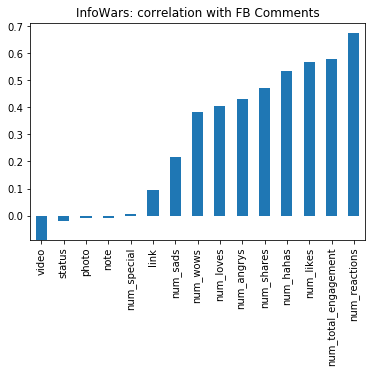

In [27]:
correlated_with_comments.iloc[:-1].plot(kind='bar',
                                        title='InfoWars: correlation with FB Comments')

In [28]:
df1['num_total_engagement'].describe()

count      4606.000000
mean       1322.945940
std        5341.609534
min          16.000000
25%         360.000000
50%         770.000000
75%        1516.000000
max      346044.000000
Name: num_total_engagement, dtype: float64

## breakdown by hour

In [29]:
df1.tail()

,status_id,status_message,link_name,status_type,status_link,status_published,num_reactions,num_comments,num_shares,num_likes,...,num_hahas,num_sads,num_angrys,num_special,num_total_engagement,link,note,photo,status,video
4601,80256732576_10154622683372577,Either pay the high cost of “Affordable” healt...,Video: Fu*%ed Over By ObamaCare,link,http://www.infowars.com/video-fued-over-by-oba...,2016-09-30 23:04:01,433,67,236,319,...,4,3,101,0,736,1,0,0,0,0
4602,80256732576_10154622607077577,Trump supporters are being violently attacked ...,Trump Supporters Violently Assaulted,link,http://www.infowars.com/trump-supporters-viole...,2016-09-30 22:09:01,328,57,81,203,...,2,10,100,0,466,1,0,0,0,0
4603,80256732576_10154622516732577,A recent investigation uncovered unpublished f...,Pesticide Manufacturers’ Tests Show Their Prod...,link,http://www.infowars.com/pesticide-manufacturer...,2016-09-30 21:11:01,200,10,105,137,...,0,13,48,0,315,1,0,0,0,0
4604,80256732576_10154622353182577,"Without any particular explanation, an emergen...",Eerie: Hacked Emergency Message Foreshadowed D...,link,http://www.infowars.com/eerie-hacked-emergency...,2016-09-30 20:08:01,338,34,273,241,...,0,4,11,0,645,1,0,0,0,0
4605,80256732576_10154622235302577,Trump is ‘proud’ of the fact that he was a maj...,Video: Trump Says He’s ‘Proud’ Of Forcing Obam...,link,http://www.infowars.com/video-trump-says-hes-p...,2016-09-30 19:03:01,321,64,17,288,...,14,0,1,0,402,1,0,0,0,0


In [30]:
df1['datetime'] = pd.to_datetime(df1['status_published'])

In [31]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4606 entries, 0 to 4605
Data columns (total 23 columns):
status_id               4606 non-null object
status_message          3406 non-null object
link_name               4595 non-null object
status_type             4606 non-null object
status_link             4597 non-null object
status_published        4606 non-null object
num_reactions           4606 non-null int64
num_comments            4606 non-null int64
num_shares              4606 non-null int64
num_likes               4606 non-null int64
num_loves               4606 non-null int64
num_wows                4606 non-null int64
num_hahas               4606 non-null int64
num_sads                4606 non-null int64
num_angrys              4606 non-null int64
num_special             4606 non-null int64
num_total_engagement    4606 non-null int64
link                    4606 non-null uint8
note                    4606 non-null uint8
photo                   4606 non-null uint8
status 

In [32]:
hours = df1['datetime'].dt.hour

In [33]:
df1['hours'] = hours

In [34]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4606 entries, 0 to 4605
Data columns (total 24 columns):
status_id               4606 non-null object
status_message          3406 non-null object
link_name               4595 non-null object
status_type             4606 non-null object
status_link             4597 non-null object
status_published        4606 non-null object
num_reactions           4606 non-null int64
num_comments            4606 non-null int64
num_shares              4606 non-null int64
num_likes               4606 non-null int64
num_loves               4606 non-null int64
num_wows                4606 non-null int64
num_hahas               4606 non-null int64
num_sads                4606 non-null int64
num_angrys              4606 non-null int64
num_special             4606 non-null int64
num_total_engagement    4606 non-null int64
link                    4606 non-null uint8
note                    4606 non-null uint8
photo                   4606 non-null uint8
status 

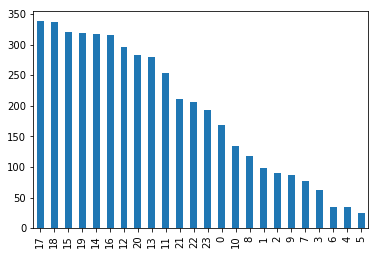

In [35]:
df1['hours'].value_counts().plot(kind='bar')

[-1, 24, 0, 100000]

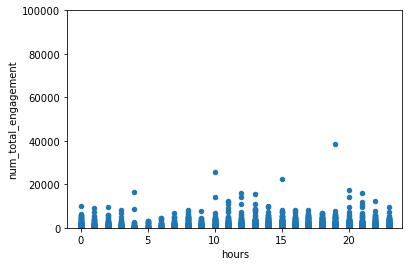

In [36]:
# breaking news can occur at any time as seem by the popular outliers
df1.plot(kind='scatter', x='hours', y='num_total_engagement')
plt.axis([-1, 24, 0, 100000])

[-1, 24, 0, 100000]

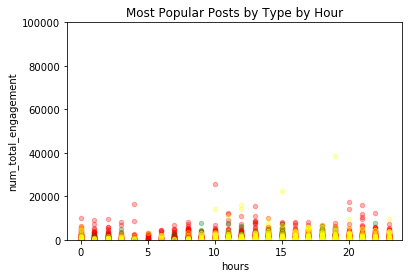

In [37]:
# note that the Facebook API is giving us when something was posted, not when it was engaged with by users
note = df1[df1['note'] == 1]
link = df1[df1['link'] == 1]
photo = df1[df1['photo'] == 1]
status = df1[df1['status'] == 1]
video = df1[df1['video'] == 1]
fig, ax = plt.subplots()

note.plot(kind='scatter', x='hours', y='num_total_engagement',
           ax=ax, color='blue', alpha=0.3,
           title='Most Popular Posts by Type by Hour')

link.plot(kind='scatter', x='hours', y='num_total_engagement',
             ax=ax, color='red', alpha=0.3)

photo.plot(kind='scatter', x='hours', y='num_total_engagement',
             ax=ax, color='green', alpha=0.3)

status.plot(kind='scatter', x='hours', y='num_total_engagement',
             ax=ax, color='black', alpha=0.3)
video.plot(kind='scatter', x='hours', y='num_total_engagement',
             ax=ax, color='yellow', alpha=0.3)
plt.axis([-1, 24, 0, 100000])

In [38]:
correlated_with_hour = df1.corr()['hours'].sort_values()

In [39]:
# Note "hour" is when a post goes public so we see there are two weak negative correlations to engagement
correlated_with_hour

link                   -0.063758
num_sads               -0.052957
num_angrys             -0.048217
num_wows               -0.042046
photo                  -0.036562
num_reactions          -0.028013
num_comments           -0.021038
num_likes              -0.020498
num_total_engagement   -0.008933
note                   -0.005742
status                 -0.003934
num_shares             -0.001286
num_hahas              -0.000970
num_loves               0.000935
num_special             0.013566
video                   0.080404
hours                   1.000000
Name: hours, dtype: float64

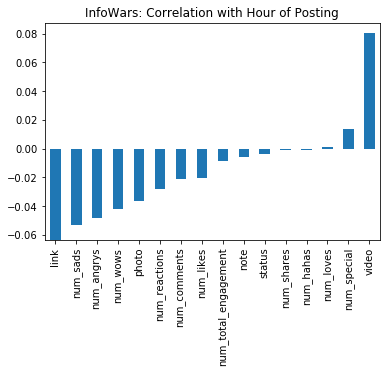

In [40]:
correlated_with_hour.iloc[:-1].plot(kind='bar',
                                        title='InfoWars: Correlation with Hour of Posting')

In [41]:
correlated_with_total_engagement = df1.corr()['num_total_engagement'].sort_values()

In [42]:
# note that most of the features below are subsets of total engagement
# of note, there are no statistically significant correlations to the type of content and total engagement
correlated_with_total_engagement

video                  -0.028170
hours                  -0.008933
status                 -0.008642
note                   -0.003438
num_special             0.001279
photo                   0.008910
link                    0.024918
num_sads                0.077906
num_angrys              0.124148
num_wows                0.175778
num_hahas               0.209159
num_loves               0.537518
num_comments            0.578721
num_reactions           0.823802
num_likes               0.859534
num_shares              0.979046
num_total_engagement    1.000000
Name: num_total_engagement, dtype: float64

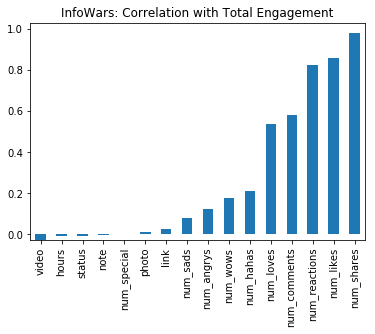

In [43]:
correlated_with_total_engagement.iloc[:-1].plot(kind='bar',
                                        title='InfoWars: Correlation with Total Engagement')

In [44]:
df1['num_total_engagement'].describe()

count      4606.000000
mean       1322.945940
std        5341.609534
min          16.000000
25%         360.000000
50%         770.000000
75%        1516.000000
max      346044.000000
Name: num_total_engagement, dtype: float64

In [45]:
# let's split off the most popular content defined by the most engaged
top75_df = df1[df1['num_total_engagement'] > 1516]

In [46]:
top75_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1150 entries, 0 to 4597
Data columns (total 24 columns):
status_id               1150 non-null object
status_message          982 non-null object
link_name               1150 non-null object
status_type             1150 non-null object
status_link             1150 non-null object
status_published        1150 non-null object
num_reactions           1150 non-null int64
num_comments            1150 non-null int64
num_shares              1150 non-null int64
num_likes               1150 non-null int64
num_loves               1150 non-null int64
num_wows                1150 non-null int64
num_hahas               1150 non-null int64
num_sads                1150 non-null int64
num_angrys              1150 non-null int64
num_special             1150 non-null int64
num_total_engagement    1150 non-null int64
link                    1150 non-null uint8
note                    1150 non-null uint8
photo                   1150 non-null uint8
status  

In [83]:
pd.set_option('max_colwidth',1000)
pd.set_option('max_columns', 100)

In [48]:
top75_df.head()

,status_id,status_message,link_name,status_type,status_link,status_published,num_reactions,num_comments,num_shares,num_likes,...,num_angrys,num_special,num_total_engagement,link,note,photo,status,video,datetime,hours
0,80256732576_10155418799987577,"Omar Navarro In Striking Distance Of Maxine Waters For Her Congressional Seat\n\nOmar Navarro joins Owen Shroyer and Alex Jones via Skype to discuss his current run for the 43rd District of California's Congressional Seat, currently filled by the failing Maxine Waters.",Omar Navarro In Striking Distance Of Maxine Waters For Her Con...,video,https://www.facebook.com/80256732576/videos/10155418799987577/,2017-05-31 18:30:00,2338,288,992,2051,...,3,0,3618,0,0,0,0,1,2017-05-31 18:30:00,18
3,80256732576_10155422200638459,The RompHim Is For Pussies,The RompHim Is For Pussies,video,https://www.facebook.com/80256732576/videos/10155422200638459/,2017-05-31 16:05:43,1359,230,597,885,...,2,0,2186,0,0,0,0,1,2017-05-31 16:05:43,16
6,80256732576_10155418570512577,Infowars has launched a $200K contest to stand up to the Left’s calls for violence against Trump & other Americans - https://www.infowars.com/200k-cash-prizes-infowars-launches-operation-expose-terrorist-mediakathy-griffin/,Timeline Photos,photo,https://www.facebook.com/80256732576/photos/a.86422397576.98136.80256732576/10155418570512577/?type=3,2017-05-31 15:03:02,3010,240,930,2435,...,328,0,4180,0,0,1,0,0,2017-05-31 15:03:02,15
16,80256732576_10155417911917577,Kathy Griffin Cuts Her Own Head Off In Career Ending Move,Kathy Griffin Cuts Her Own Head Off In Career Ending Move,video,https://www.facebook.com/80256732576/videos/10155417911917577/,2017-05-31 12:23:41,1262,304,172,977,...,18,0,1738,0,0,0,0,1,2017-05-31 12:23:41,12
21,80256732576_10155415764872577,Obama for Prison: FISA Court Says He Broke The Law,Obama for Prison: FISA Court Says He Broke The Law,video,https://www.facebook.com/80256732576/videos/10155415764872577/,2017-05-31 08:00:00,2199,189,1053,1915,...,23,0,3441,0,0,0,0,1,2017-05-31 08:00:00,8


link     900
video    192
photo     58
Name: status_type, dtype: int64


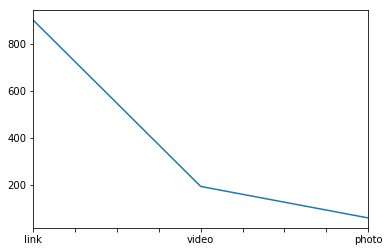

In [49]:
top75_df['status_type'].value_counts().plot()
print(top75_df['status_type'].value_counts())

In [50]:
top75_df.describe()

,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys,num_special,num_total_engagement,link,note,photo,status,video,hours
count,1150.000000,1150.000000,1150.000000,1150.000000,1150.000000,1150.000000,1150.000000,1150.000000,1150.000000,1150.000000,1150.000000,1150.000000,1150.0,1150.000000,1150.0,1150.000000,1150.000000
mean,2196.719130,267.646087,972.329565,1575.863478,92.075652,74.862609,206.671304,21.262609,225.694783,0.288696,3436.694783,0.782609,0.0,0.050435,0.0,0.166957,14.193913
std,2209.279167,343.453265,8357.067087,1996.943526,171.682967,100.544758,348.470194,59.419638,361.820029,3.728627,10389.182227,0.412650,0.0,0.218936,0.0,0.373099,6.103243
min,517.000000,27.000000,0.000000,179.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1518.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000
25%,1295.000000,108.000000,258.250000,804.250000,6.250000,14.000000,20.000000,1.000000,5.000000,0.000000,1886.000000,1.000000,0.0,0.000000,0.0,0.000000,11.000000
50%,1716.000000,177.000000,503.500000,1199.000000,26.000000,41.000000,62.500000,6.500000,58.500000,0.000000,2430.000000,1.000000,0.0,0.000000,0.0,0.000000,15.000000
75%,2405.500000,306.750000,843.250000,1796.250000,123.000000,99.000000,240.750000,20.000000,329.750000,0.000000,3552.250000,1.000000,0.0,0.000000,0.0,0.000000,19.000000
max,58845.000000,5508.000000,281691.000000,55322.000000,2388.000000,1345.000000,3115.000000,1355.000000,3257.000000,99.000000,346044.000000,1.000000,0.0,1.000000,0.0,1.000000,23.000000


In [84]:
top75_df.sort_values(by='num_shares', ascending=False)

,status_id,status_message,link_name,status_type,status_link,status_published,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys,num_special,num_total_engagement,link,note,photo,status,video,datetime,hours
2102,80256732576_10155060846937577,NaN,Trump to Defund California,video,https://www.facebook.com/80256732576/videos/10155060846937577/,2017-02-09 13:40:51,58845,5508,281691,55322,2388,111,696,41,287,0,346044,0,0,0,0,1,2017-02-09 13:40:51,13
4348,80256732576_10154658660362577,"Reporter Triggers BETA-MALE SJWs For Hillary At Second Presidential Debate \n\nInfowars Reporter Owen Shroyer The Cuck Destroyer is seen here on his favorite feeding habitat, modern day college campuses. Surrounded by a group of SJWs and BETA-MALE Owen asks many questions than the hapless mind control zombies can't answer.",Reporter Triggers BETA-MALE SJWs For Hillary At Second Preside...,video,https://www.facebook.com/80256732576/videos/10154658660362577/,2016-10-12 19:32:45,14739,4310,19340,11680,846,85,2017,39,72,0,38389,0,0,0,0,1,2016-10-12 19:32:45,19
2042,80256732576_10155056465388459,NaN,Dems Call For Muslim Bam,video,https://www.facebook.com/80256732576/videos/10155056465388459/,2017-02-12 12:11:50,5037,457,10582,4054,222,99,634,8,20,0,16076,0,0,0,0,1,2017-02-12 12:11:50,12
2906,80256732576_10154901137792577,To hilarious not to share! Be safe this weekend!!,At Christmas Dinner,video,https://www.facebook.com/80256732576/videos/10154901137792577/,2016-12-23 15:30:00,9683,2473,10376,6707,661,20,2290,2,3,0,22532,0,0,0,0,1,2016-12-23 15:30:00,15
3913,80256732576_10154730775062577,"A NBC station was caught posting election results showing a Hillary Clinton victory days before the election, fueling concerns that the mainstream media is conditioning the public to accept a rigged election favoring Hillary:",NBC Caught Preparing Hillary Victory Results Before Election,link,http://www.infowars.com/nbc-caught-preparing-hillary-victory-results-before-election/,2016-11-02 21:03:51,6225,528,9390,3150,12,537,112,36,2378,0,16143,1,0,0,0,0,2016-11-02 21:03:51,21
3841,80256732576_10154739775152577,"Secret Service stopped a would-be assassin from shooting Donald Trump at a campaign event in Reno, Nevada:",Breaking: Secret Service Stops Trump Assassin,link,http://www.infowars.com/breaking-secret-service-stops-trump-assassin/,2016-11-05 20:23:36,6903,1443,9201,4187,66,1345,136,91,1078,0,17547,1,0,0,0,0,2016-11-05 20:23:36,20
1429,80256732576_10155182594627577,"David Rockefeller, a globalist central banker who advocated a “New World Order” and mass population control while wielding vast influence over world leaders, died Monday at the age of 101:",Globalist David Rockefeller Dead at 101,link,https://www.infowars.com/globalist-david-rockefeller-dead-at-101/,2017-03-20 10:32:07,14317,2896,8558,10400,2135,269,1445,49,19,0,25771,1,0,0,0,0,2017-03-20 10:32:07,10
4040,80256732576_10154679318333459,A Vote For Hillary is a Vote For World War 3,WTF Did I Just Watch? This Might Be The Wildest Campaign Ad I...,video,https://www.facebook.com/80256732576/videos/10154679318333459/,2016-10-28 10:53:04,4982,1269,7885,3955,90,293,35,83,526,0,14136,0,0,0,0,1,2016-10-28 10:53:04,10
2201,80256732576_10155042736197577,Female Reporter Destroys Cowardly Anti-Trump Berkeley Terrorists \n\nInfowars reporter Millie Weaver destroys the narrative that the leftist anti-Trump protestors are peaceful law abiding citizens.\n\nLearn more: \nThe Truth About #UCBerkeley Riot - http://www.infowars.com/video-the-truth-about-the-berkeley-riot/,Female Reporter Destroys Cowardly Anti-Trump Berkeley Terrorists,video,https://www.facebook.com/80256732576/videos/10155042736197577/,2017-02-03 11:59:20,4866,657,5617,4116,418,149,36,18,129,0,11140,0,0,0,0,1,2017-02-03 11:59:20,11
3688,80256732576_10154760431572577,George Soros hasn’t given up and is still pushing for an all out race war and completely destroying the United States.,Soros Foundation Funding Race War/Total

In [51]:
top75_df.sort_values(by='num_total_engagement', ascending=False)

,status_id,status_message,link_name,status_type,status_link,status_published,num_reactions,num_comments,num_shares,num_likes,...,num_angrys,num_special,num_total_engagement,link,note,photo,status,video,datetime,hours
2102,80256732576_10155060846937577,NaN,Trump to Defund California,video,https://www.facebook.com/80256732576/videos/10155060846937577/,2017-02-09 13:40:51,58845,5508,281691,55322,...,287,0,346044,0,0,0,0,1,2017-02-09 13:40:51,13
4348,80256732576_10154658660362577,"Reporter Triggers BETA-MALE SJWs For Hillary At Second Presidential Debate \n\nInfowars Reporter Owen Shroyer The Cuck Destroyer is seen here on his favorite feeding habitat, modern day college campuses. Surrounded by a group of SJWs and BETA-MALE Owen asks many questions than the hapless mind control zombies can't answer.",Reporter Triggers BETA-MALE SJWs For Hillary At Second Preside...,video,https://www.facebook.com/80256732576/videos/10154658660362577/,2016-10-12 19:32:45,14739,4310,19340,11680,...,72,0,38389,0,0,0,0,1,2016-10-12 19:32:45,19
1429,80256732576_10155182594627577,"David Rockefeller, a globalist central banker who advocated a “New World Order” and mass population control while wielding vast influence over world leaders, died Monday at the age of 101:",Globalist David Rockefeller Dead at 101,link,https://www.infowars.com/globalist-david-rockefeller-dead-at-101/,2017-03-20 10:32:07,14317,2896,8558,10400,...,19,0,25771,1,0,0,0,0,2017-03-20 10:32:07,10
2906,80256732576_10154901137792577,To hilarious not to share! Be safe this weekend!!,At Christmas Dinner,video,https://www.facebook.com/80256732576/videos/10154901137792577/,2016-12-23 15:30:00,9683,2473,10376,6707,...,3,0,22532,0,0,0,0,1,2016-12-23 15:30:00,15
3841,80256732576_10154739775152577,"Secret Service stopped a would-be assassin from shooting Donald Trump at a campaign event in Reno, Nevada:",Breaking: Secret Service Stops Trump Assassin,link,http://www.infowars.com/breaking-secret-service-stops-trump-assassin/,2016-11-05 20:23:36,6903,1443,9201,4187,...,1078,0,17547,1,0,0,0,0,2016-11-05 20:23:36,20
3756,80256732576_10154750144317577,"Hillary Clinton is the first presidential contender to refuse to speak after the election results, which begs the question: Is she having a panic attack, or is she trying to flee the country?",Hillary Faces Prison After Trump Wins,link,http://www.infowars.com/hillary-faces-prison-after-trump-wins/,2016-11-09 04:00:04,11174,1070,4095,8677,...,49,0,16339,1,0,0,0,0,2016-11-09 04:00:04,4
3913,80256732576_10154730775062577,"A NBC station was caught posting election results showing a Hillary Clinton victory days before the election, fueling concerns that the mainstream media is conditioning the public to accept a rigged election favoring Hillary:",NBC Caught Preparing Hillary Victory Results Before Election,link,http://www.infowars.com/nbc-caught-preparing-hillary-victory-results-before-election/,2016-11-02 21:03:51,6225,528,9390,3150,...,2378,0,16143,1,0,0,0,0,2016-11-02 21:03:51,21
2042,80256732576_10155056465388459,NaN,Dems Call For Muslim Bam,video,https://www.facebook.com/80256732576/videos/10155056465388459/,2017-02-12 12:11:50,5037,457,10582,4054,...,20,0,16076,0,0,0,0,1,2017-02-12 12:11:50,12
2342,80256732576_10155019346812577,"The entire senior level of the State Dept. resigned on Wednesday, underscoring how the department was in step with both the Obama administration and the globalist agenda.",Drain the Swamp: Trump Triggers Mass Resignations at State Dept.,link,http://www.infowars.com/drain-the-swamp-trump-triggers-mass-resignations-at-state-dept/,2017-01-26 13:06:01,10878,963,3532,8774,...,8,0,15373,1,0,0,0,0,2017-01-26 13:06:01,13
4040,80256732576_10154679318333459,A Vote For Hillary is a Vote For World War 3,WTF Did I Just Watch? This Might Be The Wildest Campaign Ad I...,video,https://www.facebook.com/80256732576/videos/10154679318333459/,2016-10-28 10:53:04,4982,1269,7885,3955,...,526,0,14136,0,0,0,0,1,2016-10-28 10:53:04,10


In [52]:
top75_df['status_type'].value_counts()

link     900
video    192
photo     58
Name: status_type, dtype: int64

In [53]:
print("On average, videos are the most engaged content")
print(" ")
video = top75_df.loc[top75_df['status_type'] == 'video', 'num_total_engagement'].mean()
print("Avg. engagement for videos: %i" % (video))

link = top75_df.loc[top75_df['status_type'] == 'link', 'num_total_engagement'].mean()
print("Avg. engagement for links: %i" % (link))

photo = top75_df.loc[top75_df['status_type'] == 'photo', 'num_total_engagement'].mean()
print("Avg. engagement for photos: %i" % (photo))

On average, videos are the most engaged content
 
Avg. engagement for videos: 5219
Avg. engagement for links: 3064
Avg. engagement for photos: 3307


In [54]:
def count_words(df):
    mapping = dict.fromkeys(map(ord, string.punctuation))
    words = {}
    for m in df1['status_message']:
        try:
            separated_words=m.split(' ')
        except:
            pass
        for word in separated_words:
            word = word.strip()
            word = word.lower()
            word = word.translate(mapping)
            if word in stop:
                continue
            if len(word) < 2:
                continue
            if word in words:
                words[word]+=1
            else:
                words[word]=1
    print('complete')
    return words

In [55]:
words = count_words(df1)

complete


In [56]:
words_df = pd.DataFrame()
words_df['word'] = words.keys()
words_df['count'] = words.values()

In [57]:
words_df.sort_values('count', ascending=False, inplace=True)
words_df.head(25)

,word,count
10768,trump,1281
8933,president,619
3748,donald,608
6631,clinton,473
9283,us,467
11337,media,462
9757,hillary,445
11841,new,338
4195,infowars,325
7745,jones,321


In [58]:
def count_words(df):
    mapping = dict.fromkeys(map(ord, string.punctuation))
    words = {}
    for m in top75_df['status_message']:
        try:
            separated_words=m.split(' ')
        except:
            pass
        for word in separated_words:
            word = word.strip()
            word = word.lower()
            word = word.translate(mapping)
            if word in stop:
                continue
            if len(word) < 2:
                continue
            if word in words:
                words[word]+=1
            else:
                words[word]=1
    print('complete')
    return words

In [59]:
toppostswords = count_words(top75_df)

complete


In [60]:
toppostswords_df = pd.DataFrame()
toppostswords_df['word'] = toppostswords.keys()
toppostswords_df['count'] = toppostswords.values()

In [61]:
toppostswords_df.sort_values('count', ascending=False, inplace=True)
toppostswords_df.head(25)

,word,count
4302,trump,358
3477,donald,190
517,clinton,188
1308,president,171
3422,hillary,165
3083,us,136
4833,media,124
2890,obama,101
57,election,85
2745,jones,74


In [62]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4606 entries, 0 to 4605
Data columns (total 24 columns):
status_id               4606 non-null object
status_message          3406 non-null object
link_name               4595 non-null object
status_type             4606 non-null object
status_link             4597 non-null object
status_published        4606 non-null object
num_reactions           4606 non-null int64
num_comments            4606 non-null int64
num_shares              4606 non-null int64
num_likes               4606 non-null int64
num_loves               4606 non-null int64
num_wows                4606 non-null int64
num_hahas               4606 non-null int64
num_sads                4606 non-null int64
num_angrys              4606 non-null int64
num_special             4606 non-null int64
num_total_engagement    4606 non-null int64
link                    4606 non-null uint8
note                    4606 non-null uint8
photo                   4606 non-null uint8
status 

In [63]:
df1.datetime.head()

0   2017-05-31 18:30:00
1   2017-05-31 17:30:00
2   2017-05-31 17:22:49
3   2017-05-31 16:05:43
4   2017-05-31 16:05:03
Name: datetime, dtype: datetime64[ns]

In [64]:
potus_df = df1[df1['datetime'] > '2017-01-20']

In [65]:
def count_words(df):
    mapping = dict.fromkeys(map(ord, string.punctuation))
    words = {}
    for m in potus_df['status_message']:
        try:
            separated_words=m.split(' ')
        except:
            pass
        for word in separated_words:
            word = word.strip()
            word = word.lower()
            word = word.translate(mapping)
            if word in stop:
                continue
            if len(word) < 2:
                continue
            if word in words:
                words[word]+=1
            else:
                words[word]=1
    print('complete')
    return words

In [66]:
potuswords = count_words(potus_df)

complete


In [67]:
potuswords_df = pd.DataFrame()
potuswords_df['word'] = potuswords.keys()
potuswords_df['count'] = potuswords.values()

In [68]:
potuswords_df.sort_values('count', ascending=False, inplace=True)
potuswords_df.head(25)

,word,count
6044,trump,606
3723,president,416
4297,us,213
4867,donald,211
6777,media,179
7424,new,173
5435,infowars,166
7683,jones,137
4998,white,127
4021,obama,119


In [69]:
text = str(potus_df['status_message'].tolist())
text

'["Omar Navarro In Striking Distance Of Maxine Waters For Her Congressional Seat\\n\\nOmar Navarro joins Owen Shroyer and Alex Jones via Skype to discuss his current run for the 43rd District of California\'s Congressional Seat, currently filled by the failing Maxine Waters.", "Trump\'s Secret Weapon: Delivering\\n\\nRoger Stone joins Alex Jones live in studio to discuss President Trumps promises along the campaign trail, and how he can offensively deliver on those policy positions to win another term.", \'Full Show - Infowars Launches Operation Expose Terrorist Media After Kathy Griffin’s Stunt Backfires - 05/31/2017\', \'The RompHim Is For Pussies\', \'CNN analyst claimed that the Trumps are taking advantage of the incident and “playing the victim” to get sympathy.\', \'Agenda talking points and a list of participants for the upcoming 65th annual Bilderberg globalist confab have been announced.\', \'Infowars has launched a $200K contest to stand up to the Left’s calls for violence ag

In [70]:
from wordcloud import WordCloud, STOPWORDS

In [71]:
normal_word = r"(?:\w[\w']+)"
regexp = r"{normal_word}".format(normal_word=normal_word)                                                      
stopwords = set(STOPWORDS)
stopwords.add("nan")
stopwords.add("https")
stopwords.add("new")
stopwords.add("Alex Jones")
stopwords.add("infowar")
stopwords.add("Jones")
stopwords.add("infowars")

In [72]:
# Generate a word cloud image
wordcloud = WordCloud(regexp=regexp, stopwords=stopwords).generate(text)

In [73]:
fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 12
fig_size[1] = 8
plt.rcParams["figure.figsize"] = fig_size

In [75]:
image = wordcloud.to_image()
image.show()

In [76]:
text = str(df1['status_message'].tolist())
text

'["Omar Navarro In Striking Distance Of Maxine Waters For Her Congressional Seat\\n\\nOmar Navarro joins Owen Shroyer and Alex Jones via Skype to discuss his current run for the 43rd District of California\'s Congressional Seat, currently filled by the failing Maxine Waters.", "Trump\'s Secret Weapon: Delivering\\n\\nRoger Stone joins Alex Jones live in studio to discuss President Trumps promises along the campaign trail, and how he can offensively deliver on those policy positions to win another term.", \'Full Show - Infowars Launches Operation Expose Terrorist Media After Kathy Griffin’s Stunt Backfires - 05/31/2017\', \'The RompHim Is For Pussies\', \'CNN analyst claimed that the Trumps are taking advantage of the incident and “playing the victim” to get sympathy.\', \'Agenda talking points and a list of participants for the upcoming 65th annual Bilderberg globalist confab have been announced.\', \'Infowars has launched a $200K contest to stand up to the Left’s calls for violence ag

In [77]:
# Generate a word cloud image
wordcloud = WordCloud(regexp=regexp, stopwords=stopwords).generate(text)